# Intersection between MOCs

In [1]:
import matplotlib.pyplot as plt
from astropy.visualization.wcsaxes.frame import EllipticalFrame
from astropy.wcs import WCS
from mocpy import MOC

In [2]:
aitoff = WCS(
    {
        "naxis": 2,
        "naxis1": 324,
        "naxis2": 162,
        "crpix1": 162.5,
        "crpix2": 81.5,
        "cdelt1": -1,
        "cdelt2": 1,
        "ctype1": "RA---AIT",
        "ctype2": "DEC--AIT",
    },
)

Let's start by loading a local MOC and plotting it

In [3]:
%%time
m1 = MOC.from_fits("../resources/P-SDSS9-r.fits")

CPU times: user 3.46 ms, sys: 101 µs, total: 3.56 ms
Wall time: 3.57 ms


Now, we load MOC for GALEX GR6 AIS FUV:

In [4]:
%%time
m2 = MOC.from_fits("../resources/P-GALEXGR6-AIS-FUV.fits")

CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 1.61 ms


CPU times: user 201 ms, sys: 10.4 ms, total: 211 ms
Wall time: 201 ms
CPU times: user 198 ms, sys: 2.94 ms, total: 201 ms
Wall time: 194 ms


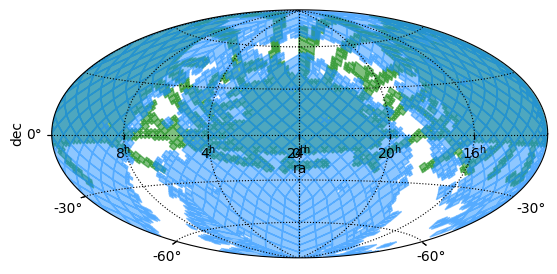

In [5]:
fig = plt.figure(111)

ax = fig.add_subplot(1, 1, 1, projection=aitoff, frame_class=EllipticalFrame)

%time m1.fill(ax=ax, wcs=aitoff, alpha=0.5, fill=True, color="green")
%time m2.fill(ax=ax, wcs=aitoff, alpha=0.5, fill=True, color="dodgerblue")

ax.set_aspect(1.0)

plt.xlabel("ra")
plt.ylabel("dec")
plt.grid(color="black", linestyle="dotted")

We can compute the intersection between the 2 MOC:

CPU times: user 183 ms, sys: 3.65 ms, total: 187 ms
Wall time: 177 ms
CPU times: user 83 ms, sys: 73 µs, total: 83 ms
Wall time: 81.1 ms


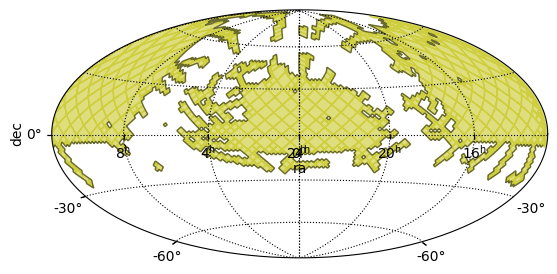

In [6]:
m_intersect = m1.intersection(m2)

fig = plt.figure(111)

ax = fig.add_subplot(1, 1, 1, projection=aitoff, frame_class=EllipticalFrame)

%time m_intersect.fill(ax=ax, wcs=aitoff, alpha=0.5, fill=True, color="y")
%time m_intersect.border(ax=ax, wcs=aitoff, alpha=0.5, fill=True, color="black")

ax.set_aspect(1.0)

plt.xlabel("ra")
plt.ylabel("dec")
plt.grid(color="black", linestyle="dotted")

And serialize it to FITS (official serialization):

In [7]:
%time hdulist = m_intersect.serialize(format='fits')

CPU times: user 3.87 ms, sys: 2.17 ms, total: 6.03 ms
Wall time: 2.07 ms


## MOC can also be serialized in JSON

In [8]:
m_intersect.to_string(format="json")

'{\n  "4": [128, 134, 278, 282, 289, 292, 306, 308, 310, 325, 327, 337, 345, 352, 364, 369, 370, 371, 372, 376, 378, 383, 399, 402, 406, 408, 455, 460, 464, 465, 514, 515, 516, 518, 520, 521, 524, 525, 541, 544, 545, 546, 558, 563, 573, 574, 575, 577, 578, 579, 580, 590, 612, 619, 620, 622, 649, 652, 661, 664, 672, 680, 684, 685, 688, 718, 746, 789, 1079, 1083, 1084, 1086, 1102, 1103, 1106, 1114, 1120, 1121, 1123, 1126, 1128, 1129, 1130, 1132, 1133, 1135, 1137, 1164, 1169, 1172, 1176, 1186, 1190, 1203, 1217, 1221, 1226, 1230, 1231, 1235, 1237, 1258, 1259, 1631, 1638, 1639, 1645, 1651, 1657, 1659, 1660, 1661, 1709, 1710, 1711, 1714, 1720, 1725, 1727, 1732, 1734, 1749, 1750, 1751, 1752, 1754, 1767, 1768, 1770, 1773, 1779, 1781, 1782, 1785, 1787, 1788, 1790, 1966, 1976, 1978, 2026, 2299],\n  "5": [0, 32, 137, 138, 164, 168, 170, 171, 174, 177, 508, 509, 516, 518, 519, 520, 521, 522, 527, 540, 542, 544, 546, 547, 552, 553, 554, 560, 561, 562, 607, 640, 641, 644, 650, 651, 665, 974, 975, 10

# Or write it directly to a FITS/JSON file:

m_intersect.save(path="/tmp/moc", write_to_file=True, format='json')
